# Large Growth Fund Category Analysis: QQQ vs VUG vs IWF vs IVW

This analysis compares the top 4 Large Growth funds ('high risk / high reward') by fund size (in billions - USD). Those index funds are:<br />

QQQ - Invesco QQQ Trust - 0.20% annual expense ratio<br />
VUG - Vanguard Growth Index Fund - 0.04% annual expense ratio<br />
IWF - iShares Russell 1000 Growth ETF - 0.19% annual expense ratio<br />
IVW - iShares S&P 500 Growth ETF - 0.18% annual expense ratio<br />

<br />
The statistical models check the following:<br />
1. Average volume of shares or index funds' units traded with respect to time<br />
2. Highest/Lowest/Open index fund prices traded with respect to time<br />
3. Market Capitalization<br />
4. Trends using moving averages - Do share prices tend to increase in the long term?<br />
5. Stock Returns & Volatility - for Annualized & Daily Returns<br />
6. Correlation<br />

<br />
Morningstar fund definitions:<br /> 
1. Large Growth Funds are defined as those that invest in large-sized companies projected to grow fast. These tend to have high volatility, and high valuations (high price ratios & low dividend yields). These are known for being ‘high risk but high reward’<br />
2. Large Value Funds are defined as those that invest in large-sized companies that have slow growth and low valuations (low price ratios and high dividend yields)<br />
3. Large Blend Funds are defined as those that invest in a combination of large Value & large Growth. These funds represent the overall U.S. Stock market and invest in across the spectrum of U.S. industries.<br />

# Step 1 - Import Libraries & Download Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Dates range from 01/03/2011 to 12/29/2023 for QQQ, VUG, IWF & IVW

In [2]:
# Define start & end dates, then import data from Yahoo Finance
# Top 4 Large Growth Fund ETFs are QQQ, VUG, IWF & IVW
# As in today (December 11, 2023) these ETFs continue to grow

start = "2011-01-03"
end = "2023-12-29"

# Get data
qqq = yf.download("QQQ", start, end)
vug = yf.download("VUG", start, end)
iwf = yf.download("IWF", start, end)
ivw = yf.download("IVW", start, end)

# Correlation data compilation for 'Step 12'
tickers = ['QQQ', 'VUG', 'IWF', 'IVW']
data = yf.download(tickers, start, end, group_by='ticker')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed


In [ ]:
# Display qqq to verify no errors in download
qqq

In [ ]:
# Display vug to verify no errors in download
vug

In [ ]:
# Display iwf to verify no errors in download
iwf

In [ ]:
# Display ivw to verify no errors in download
ivw

# Step 2 - Summarize the Data Frames - Get Statistics

In [3]:
# Define a function to obtain necessary info. for each ETF
def get_info(dataframe):
    etf_info =pd.DataFrame({
                    'Datatype': dataframe.dtypes,                                      # Columns' data type
                    'Total_Element': dataframe.count(),                                # Total elements in column
                    'Null_Count': dataframe.isnull().sum(),                            # Total null values
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100   # Null values %
    })
    return etf_info  

In [4]:
# Call the function to see datatypes from each column of Yahoo Finance's data
get_info(qqq)
get_info(vug)
get_info(iwf)
get_info(ivw)

,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,3269,0,0.0
High,float64,3269,0,0.0
Low,float64,3269,0,0.0
Close,float64,3269,0,0.0
Adj Close,float64,3269,0,0.0
Volume,int64,3269,0,0.0


In [5]:
# QQQ's basic stats
qqq.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3.269000e+03
mean,174.175950,175.451352,172.804540,174.224876,168.489501,4.274149e+07
std,104.645641,105.554103,103.679140,104.680701,105.754737,2.294780e+07
min,50.419998,51.240002,49.930000,50.029999,44.529575,7.079300e+06
25%,88.510002,89.150002,87.889999,88.550003,81.474541,2.630770e+07
50%,141.190002,141.529999,140.570007,141.050003,134.671646,3.767550e+07
75%,271.200012,274.779999,267.869995,270.489990,266.625061,5.341350e+07
max,412.670013,412.920013,410.940002,411.500000,411.500000,2.141118e+08


In [6]:
# VUG's basic stats
vug.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3.269000e+03
mean,151.562515,152.529202,150.486054,151.579939,145.320229,7.993915e+05
std,75.171911,75.804853,74.481339,75.185704,77.271610,5.162107e+05
min,53.599998,55.639999,53.090000,54.279999,47.498741,1.204000e+05
25%,93.889999,94.349998,93.260002,93.900002,85.047668,5.016000e+05
50%,128.389999,129.020004,128.059998,128.479996,121.497406,6.708000e+05
75%,219.259995,221.009995,216.619995,218.419998,215.826553,9.211000e+05
max,327.049988,328.519989,324.769989,325.670013,320.993134,9.733700e+06


In [7]:
# IWF's basic stats
iwf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3.269000e+03
mean,144.423570,145.346709,143.427617,144.455353,138.148967,1.967843e+06
std,73.605319,74.212679,72.964511,73.622962,75.507010,1.184902e+06
min,50.400002,52.310001,49.959999,51.040001,44.283127,4.406000e+05
25%,86.629997,87.010002,86.089996,86.580002,78.023613,1.207700e+06
50%,120.480003,120.839996,120.099998,120.489998,113.297653,1.704000e+06
75%,213.419998,215.460007,211.339996,213.369995,209.906113,2.347500e+06
max,310.260010,311.950012,308.369995,309.519989,304.629303,1.710860e+07


In [8]:
# IVW's basic stats
ivw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3.269000e+03
mean,40.025603,40.268819,39.743809,40.031920,37.915138,2.819962e+06
std,18.963597,19.116525,18.805294,18.965559,19.582613,2.085923e+06
min,14.715000,15.232500,7.050000,14.907500,12.670908,5.256000e+05
25%,24.975000,25.115000,24.827499,24.995001,22.137449,1.588800e+06
50%,34.737499,34.860001,34.637501,34.747501,32.280022,2.217700e+06
75%,57.820000,58.417500,57.360001,57.770000,56.497234,3.233200e+06
max,85.089996,85.089996,84.320000,84.809998,83.183197,3.640720e+07


# Step 3 - Comparison of Funds (Average Volume of Units Traded)

In [9]:
# Find the average of the volume of ETFs traded over time for each stock.
# Round off the value.
qqq_vol_avg = round(qqq["Volume"].mean())
vug_vol_avg = round(vug["Volume"].mean())
iwf_vol_avg = round(iwf["Volume"].mean())
ivw_vol_avg = round(ivw["Volume"].mean())

# Convert results in array
vol_avg = np.array([qqq_vol_avg, vug_vol_avg, iwf_vol_avg, ivw_vol_avg])

In [10]:
# Print
qqq_note = "Average volume for QQQ is: " + str(vol_avg[0])
vug_note = "Average volume for VUG is: " + str(vol_avg[1])
iwf_note = "Average volume for IWF is: " + str(vol_avg[2])
ivw_note = "Average volume for IVW is: " + str(vol_avg[3])

In [11]:
qqq_note

'Average volume for QQQ is: 42741490'

In [12]:
vug_note

'Average volume for VUG is: 799391'

In [13]:
iwf_note

'Average volume for IWF is: 1967843'

In [14]:
ivw_note

'Average volume for IVW is: 2819962'

### Note that QQQ (42.8M) has the highest trading volume, followed by IVW (2.8M), IWF (2.0M) and then VUG (800 Thousands)

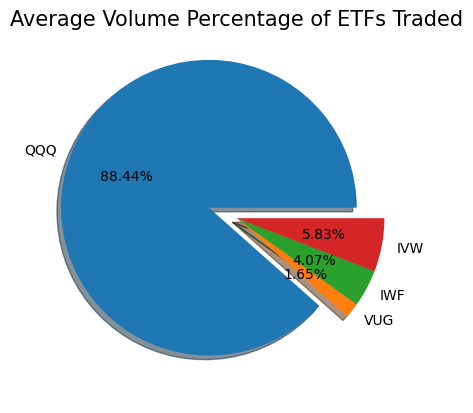

In [15]:
# Create a pie chart
# Set labels
mylabels = ["QQQ", "VUG", "IWF", "IVW"]
myexplode = [0.2, 0, 0, 0] # To create exploding wedge

# Set data points & graph
plt.pie(vol_avg, labels=mylabels, explode=myexplode, shadow=True, autopct='%1.2f%%')
plt.title('Average Volume Percentage of ETFs Traded', fontsize=15);

# Step 4 - Visualize the Trade Volume over Time

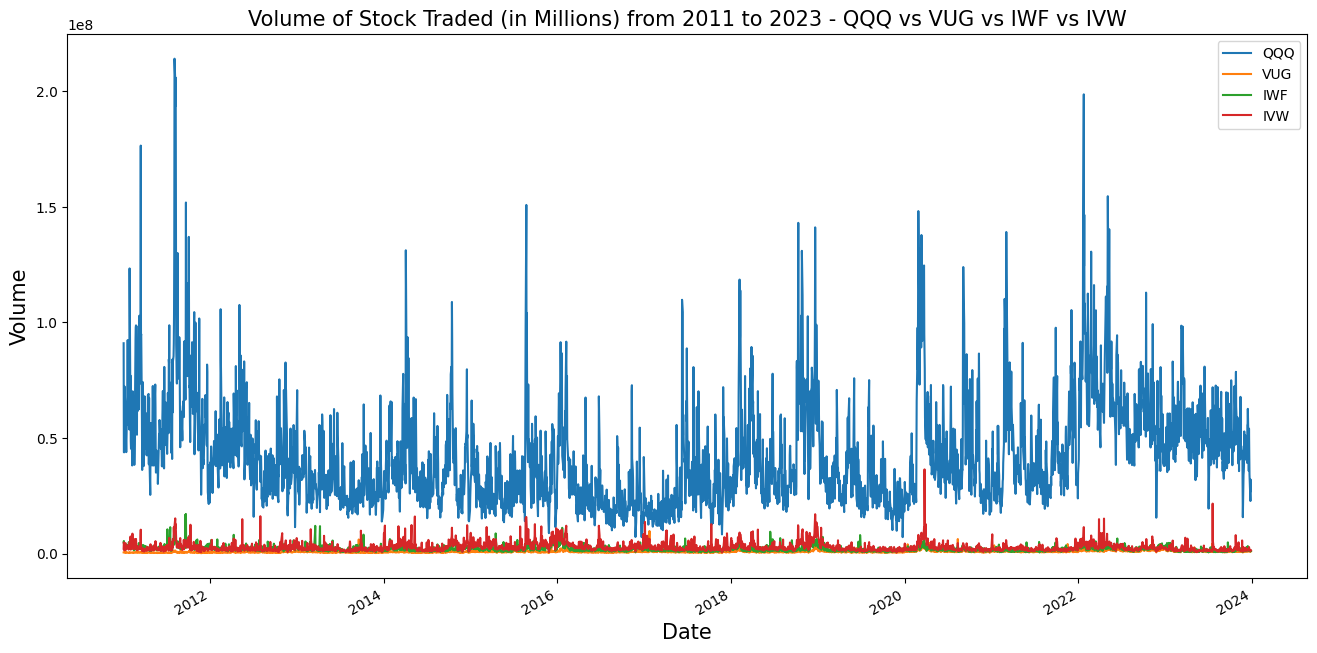

In [16]:
# Perform the visualization in a single graph
# Set data points
qqq['Volume'].plot(label='QQQ', figsize=(16,8))
vug['Volume'].plot(label='VUG')
iwf['Volume'].plot(label='IWF')
ivw['Volume'].plot(label='IVW')

# Set graph
plt.title('Volume of Stock Traded (in Millions) from 2011 to 2023 - QQQ vs VUG vs IWF vs IVW', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume', fontsize=15)
plt.legend();

### The graph (QQQ vs VUG vs IWF vs IVW) shows that QQQ clearly surpasses the rest when it comes to trading volume. 

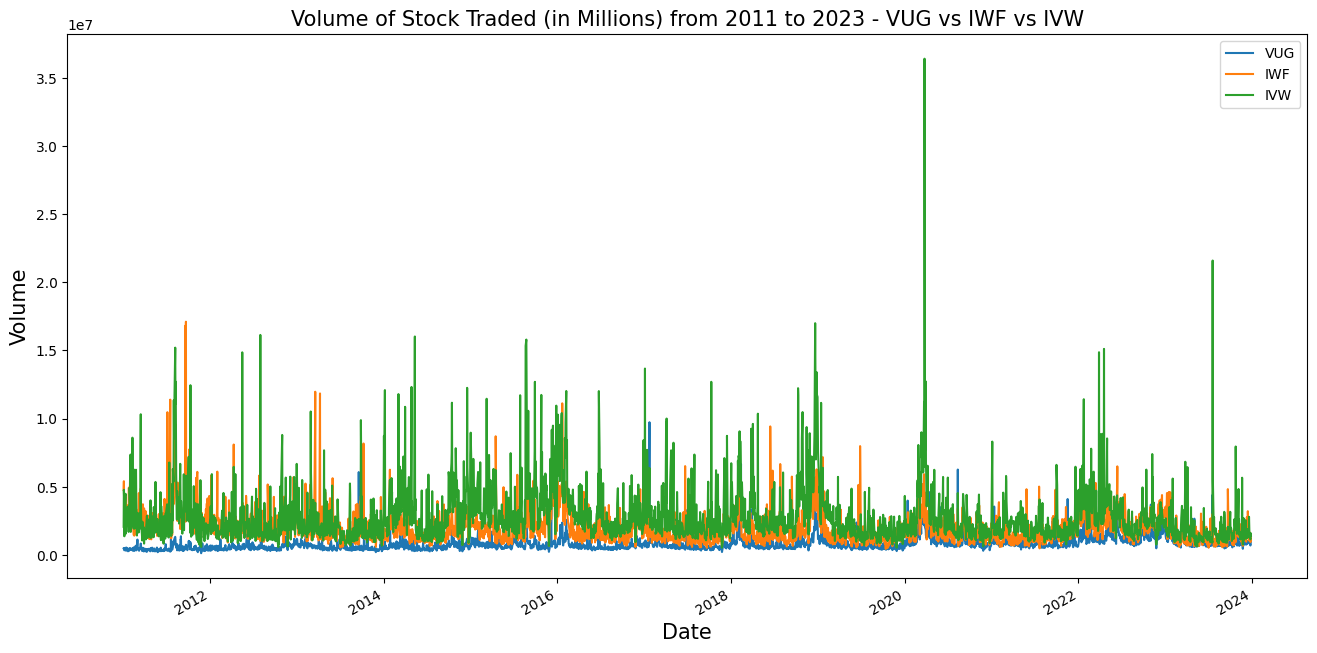

In [17]:
# Perform the visualization in a single graph
# Set data points
vug['Volume'].plot(label='VUG', figsize=(16,8))
iwf['Volume'].plot(label='IWF')
ivw['Volume'].plot(label='IVW')

# Set graph
plt.title('Volume of Stock Traded (in Millions) from 2011 to 2023 - VUG vs IWF vs IVW', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume', fontsize=15)
plt.legend();

### The graph (VUG vs IWF vs IVW) shows that IVW has a higher to trading volume overrall, followed by IWF & then VUG. This graph is the same as the previous, however we exclude QQQ as its higher volume values zooms out the rest of the funds.

# Step 5 - Find the Highest Price (in USD) of ETFs Traded with Time

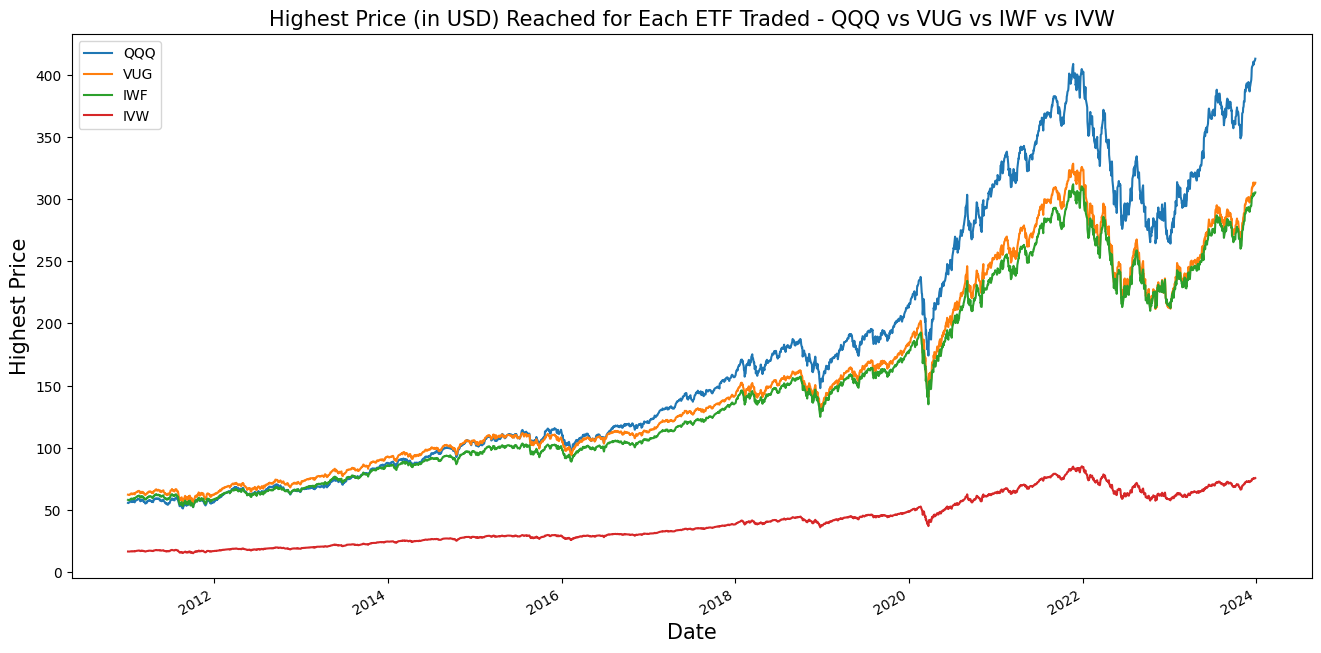

In [18]:
# Perform the visualization in a single graph
# Set Data points
qqq['High'].plot(label = 'QQQ', figsize = (16,8)) 
vug['High'].plot(label = 'VUG') 
iwf['High'].plot(label = 'IWF')
ivw['High'].plot(label = 'IVW')

# Set Graph
plt.title('Highest Price (in USD) Reached for Each ETF Traded - QQQ vs VUG vs IWF vs IVW', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Highest Price', fontsize=15)
plt.legend();

# Step 6 - Find the Lowest Price (in USD) of ETFs Traded with Time

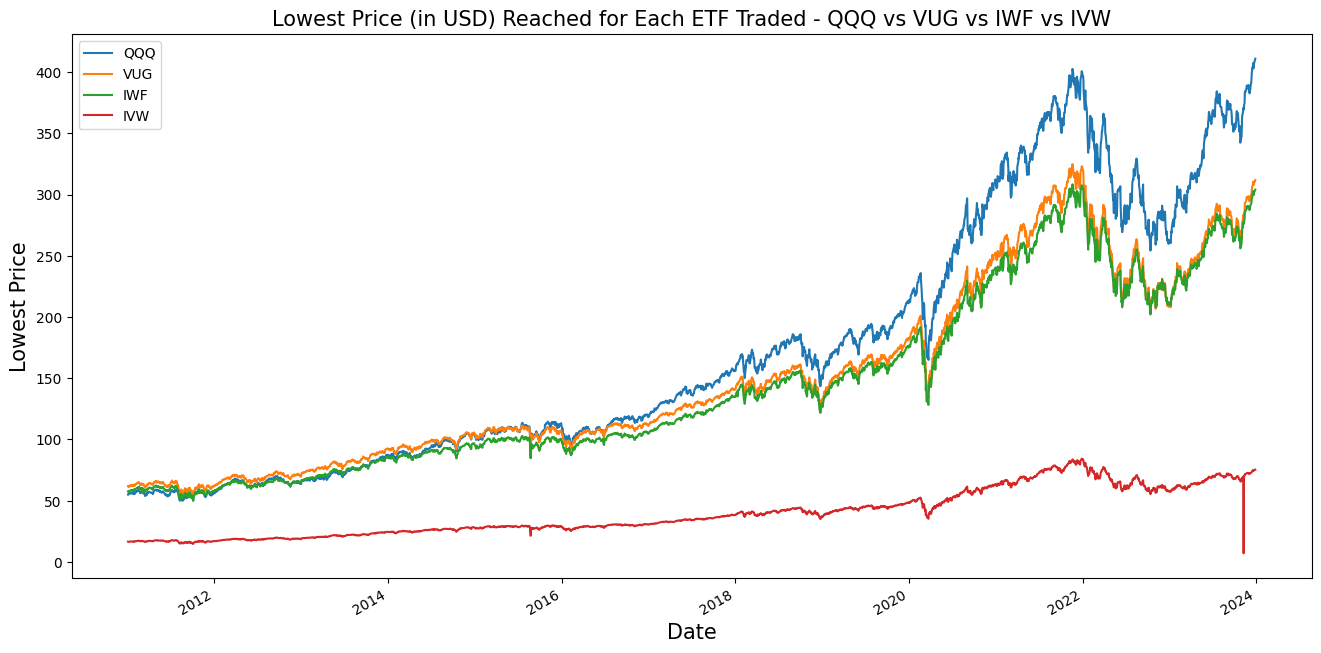

In [19]:
# Perform the visualization in a single graph
# Set Data points
qqq['Low'].plot(label = 'QQQ', figsize = (16,8)) 
vug['Low'].plot(label = 'VUG') 
iwf['Low'].plot(label = 'IWF')
ivw['Low'].plot(label = 'IVW')

# Set Graph
plt.title('Lowest Price (in USD) Reached for Each ETF Traded - QQQ vs VUG vs IWF vs IVW', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Lowest Price', fontsize=15)
plt.legend();

# Step 7 - Find the Open Price (in USD) of ETFs Traded with Time

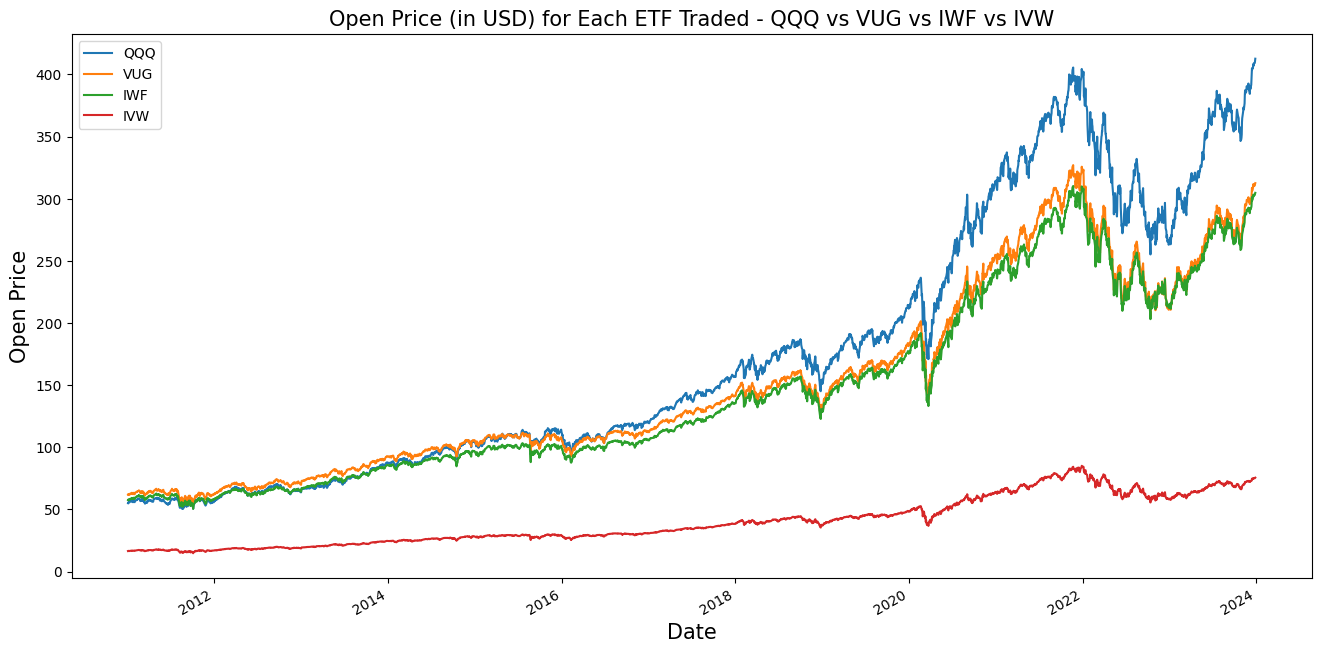

In [20]:
# Perform the visualization in a single graph
# Set Data points
qqq['Open'].plot(label = 'QQQ', figsize = (16,8)) 
vug['Open'].plot(label = 'VUG') 
iwf['Open'].plot(label = 'IWF')
ivw['Open'].plot(label = 'IVW')

# Set Graph
plt.title('Open Price (in USD) for Each ETF Traded - QQQ vs VUG vs IWF vs IVW', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Open Price', fontsize=15)
plt.legend();

# Step 8 - Market Capitalization

This gives the value of an ETF that is traded in the stock market. This allows investors to understand how valuable the index fund is perceived.
The size and value of an ETF gives the level of risk one might expect when investing in it, as well as how much an investment might return over time.
It is found by calculating the product of the total number of shares with the present price of shares.

M_Cap = Total Number of Shares * Present Shares Price


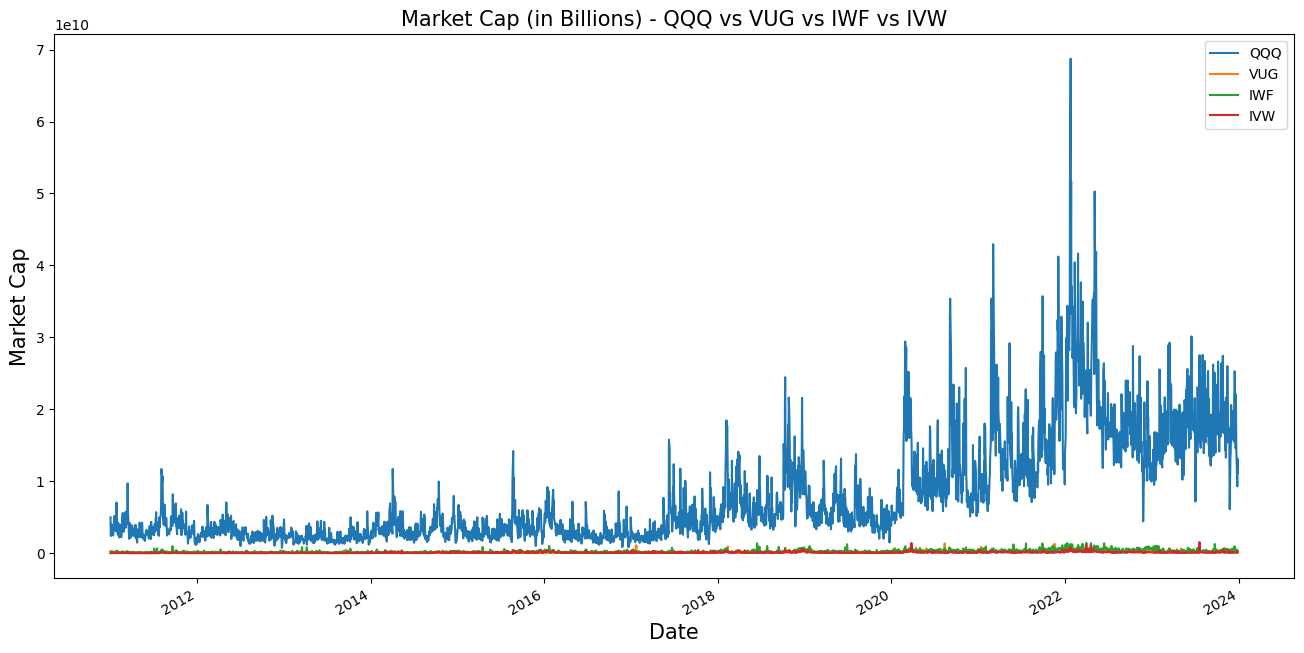

In [21]:
# Perform the visualization in a single graph
qqq['M_Cap'] = qqq['Open'] * qqq['Volume']
vug['M_Cap'] = vug['Open'] * vug['Volume']
iwf['M_Cap'] = iwf['Open'] * iwf['Volume']
ivw['M_Cap'] = ivw['Open'] * ivw['Volume']

# Set Data points
qqq['M_Cap'].plot(label = 'QQQ', figsize = (16,8)) 
vug['M_Cap'].plot(label = 'VUG') 
iwf['M_Cap'].plot(label = 'IWF')
ivw['M_Cap'].plot(label = 'IVW')

# Set Graph
plt.title('Market Cap (in Billions) - QQQ vs VUG vs IWF vs IVW', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Market Cap', fontsize=15)
plt.legend();

### For the given data, we can see that QQQ provides the greatest Market Cap over time (12 years worth of data), this is expected as QQQ has a higher trading volume. Note that large growth ETFs tend to be more volatile & imply a higher risk. For instance, QQQ would be considered as a 'high risk - high reward' ETF.

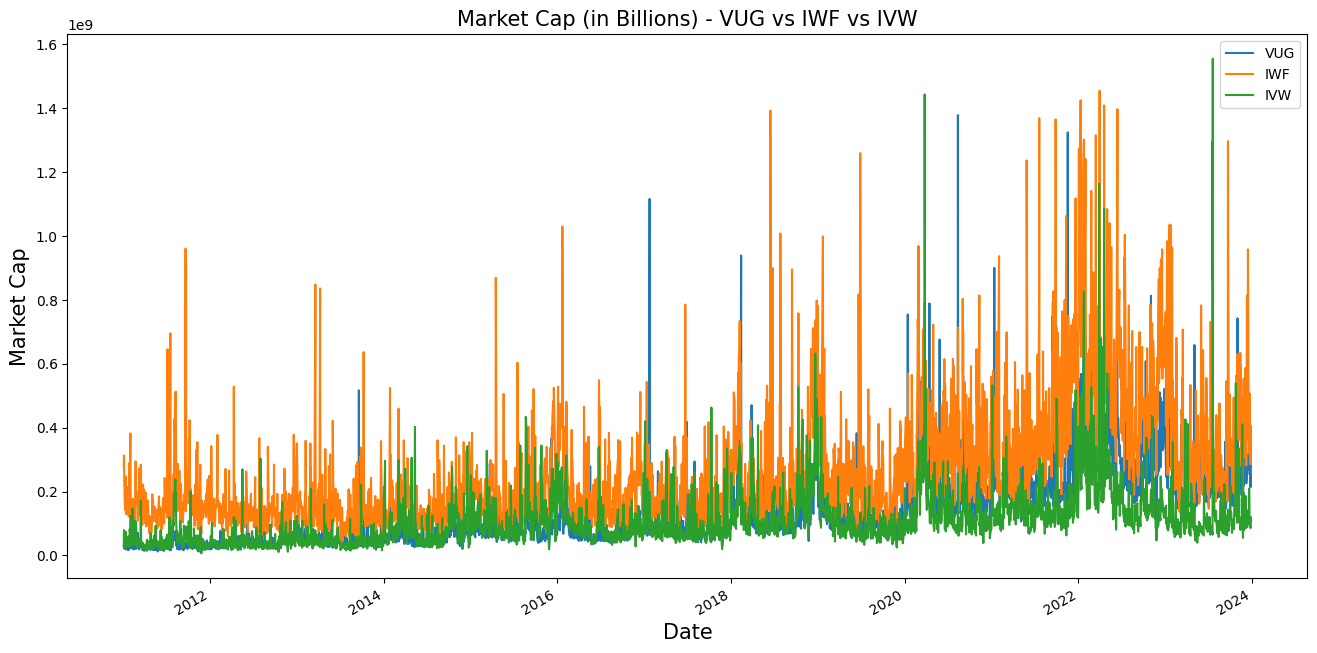

In [22]:
# Perform the visualization in a single graph
#vug['M_Cap'] = vug['Open'] * vug['Volume']
#iwf['M_Cap'] = iwf['Open'] * iwf['Volume']
#ivw['M_Cap'] = ivw['Open'] * ivw['Volume']

# Set data points
vug['M_Cap'].plot(label = 'VUG', figsize = (16,8))  
iwf['M_Cap'].plot(label = 'IWF')
ivw['M_Cap'].plot(label = 'IVW')

# Set graph
plt.title('Market Cap (in Billions) - VUG vs IWF vs IVW', fontsize=15) 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Market Cap', fontsize=15)
plt.legend();

### For the given data (QQQ excluded), we can see that IWF has an overall greater Market Cap compared to VUG & IVW in recent years, this can be seen more clearly in the 2021-2024 segment as IWF's numbers in the Y-axis get higher as time passed by. It is hard to tell with precision which ETF among VUG, IWF & IVW will provide the best returns, as mentioned previously, large growth ETFs are highly more volatile, and although historical data is useful, this graph is not a prediction model.

# Step 9 - Moving Averages: Determine if the Funds have Significant Upward Trends

Moving Averages are used to deal with price fluctuations, since ETF prices change rapidly over time. In general, an upward trend in a moving average (bull market) might imply an increase in the price or momentum of a security, while a downward trend (bear market) would be seen as a decline.

We can use the help of 50-day and 200-day averages to look for trends. The 200-day moving average is considered especially significant in stock/ETF trading. As long as the 50-day moving average of a stock price remains above the 200-day moving average, the stock is generally thought to be in a bullish trend.

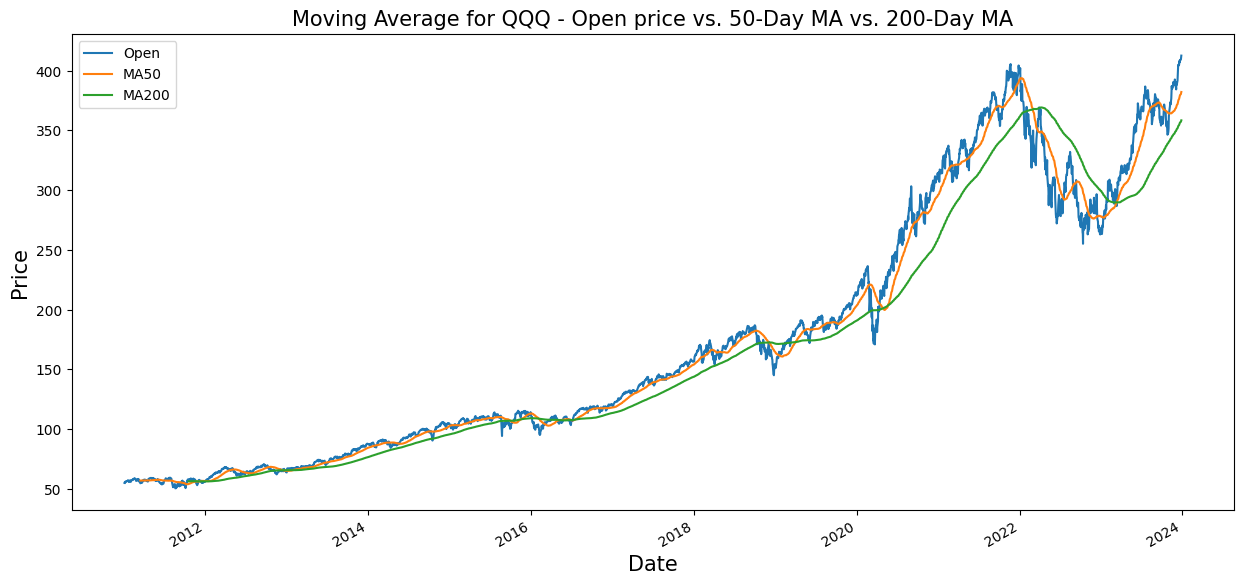

In [23]:
# Perform the visualization on moving average
qqq['MA50'] = qqq['Open'].rolling(50).mean() 
qqq['MA200'] = qqq['Open'].rolling(200).mean()

# Set data points
qqq['Open'].plot(figsize = (15,7))
qqq['MA50'].plot()
qqq['MA200'].plot()

# Set graph
plt.title('Moving Average for QQQ - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

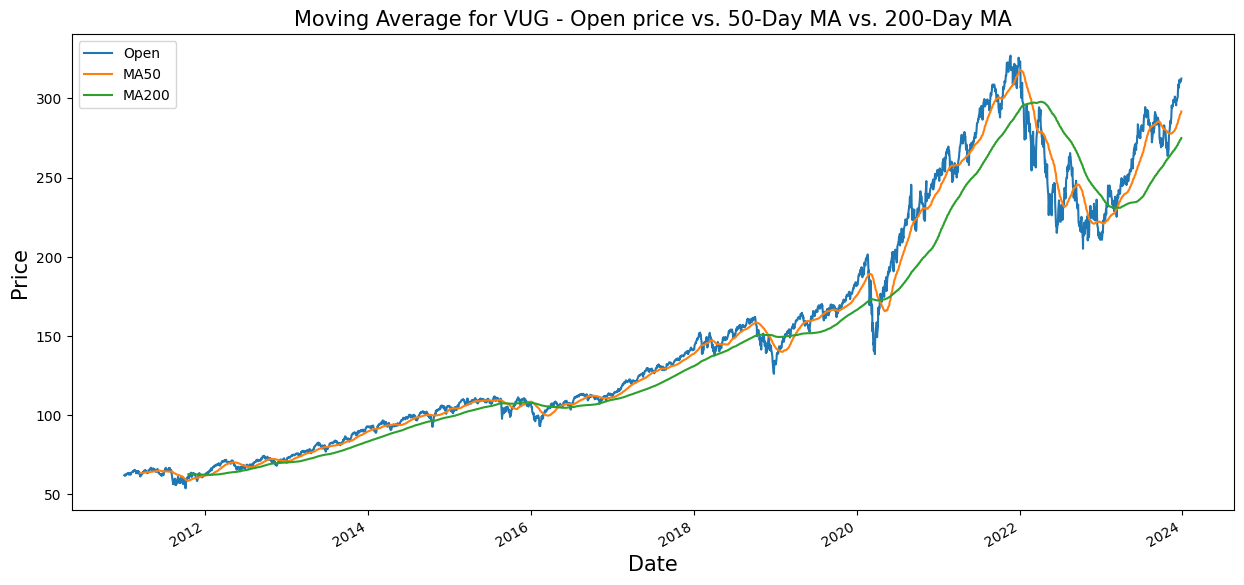

In [24]:
# Perform the visualization on moving average
vug['MA50'] = vug['Open'].rolling(50).mean() 
vug['MA200'] = vug['Open'].rolling(200).mean()

# Set data points
vug['Open'].plot(figsize = (15,7))
vug['MA50'].plot()
vug['MA200'].plot()

# Set graph
plt.title('Moving Average for VUG - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

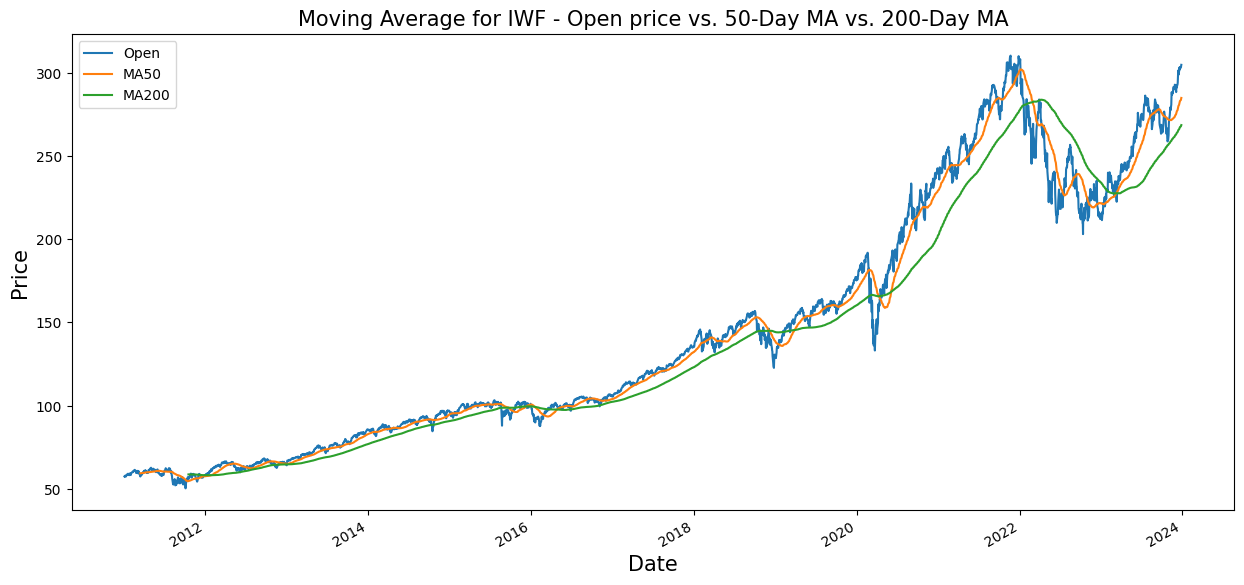

In [25]:
# Perform the visualization on moving average
iwf['MA50'] = iwf['Open'].rolling(50).mean() 
iwf['MA200'] = iwf['Open'].rolling(200).mean()

# Set data points
iwf['Open'].plot(figsize = (15,7))
iwf['MA50'].plot()
iwf['MA200'].plot()

# Set graph
plt.title('Moving Average for IWF - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

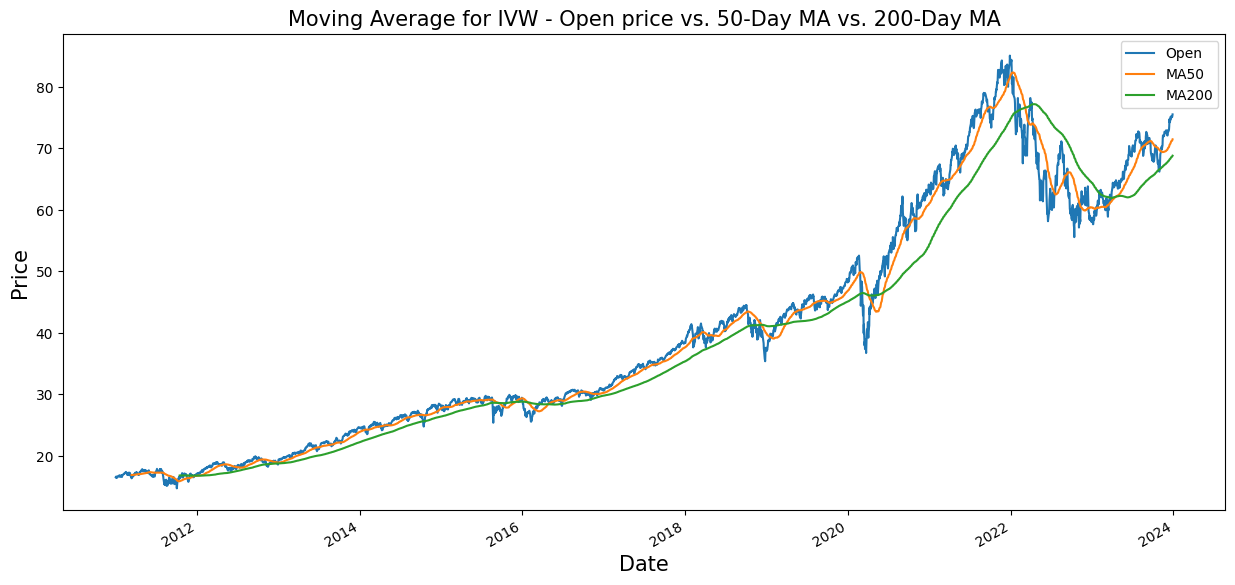

In [26]:
# Perform the visualization on moving average
ivw['MA50'] = ivw['Open'].rolling(50).mean() 
ivw['MA200'] = ivw['Open'].rolling(200).mean()

# Set data points
ivw['Open'].plot(figsize = (15,7))
ivw['MA50'].plot()
ivw['MA200'].plot()

# Set graph
plt.title('Moving Average for IVW - Open price vs. 50-Day MA vs. 200-Day MA', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend();

### Notice that the historical stock market data (12 years of collected data points available in Yahoo Finance) for the 4 ETFs (QQQ, VUG, IWF & IVW) trend 'upwards', meaning that their prices tend to increase in monetary value with respect to time. Notice that the orange lines or moving averages tend to increase with respect to time as well. Although there will always be economic downturns (such as 2020 when a global pandemic was declared, and during the 1st 2 years of the Ukraine & Russia war) that will cause stock/ETF prices to decrease, markets eventually recover and prices will not decrease or stagnate in the long run. Although these ETFs trend 'upwards', large growth ETFs are still considered to be high risk funds.

# Step 10 - Volatility & Stock/ETF Returns

A percentage increase in an index fund or ETF value is the change in that same fund comparing that to the previous day. The bigger the value either positive or negative the volatile the stock or fund is. For instance, an AMAZON share that during day 1, 2, & 3 cost 153.00, 152.63 and 154.03 respectively is less volatile than bitcoin that during day 1, 2, & 3 cost 100.00, 180.23 and suddenly plummets to 40.89 respectively.

The formula for interday return is:
rt = (Pt/Pt-1) - 1, where,
</br>
rt = Return, </br>
Pt = Price at time T (close price of current day), </br>
Pt-1 = Price at time T-1 (close price of the previous day).</br>

Most investors fear volatility, hence stability is preferred. It is essential for our analysis to model the potential range of an investment's possible returns with the appearance of a normal distribution, however stock or ETF returns are statistically not normally distributed - meaning that there will always be many outliers. To describe an investment, we only need to get 3 values: the mean (a.k.a. the investment’s expected return), the standard deviation (a.k.a. the investment’s risk or volatility for daily returns) and the annualized volatility.
With the help of histograms, we can find out whether an index fund or ETF is relatively stable.

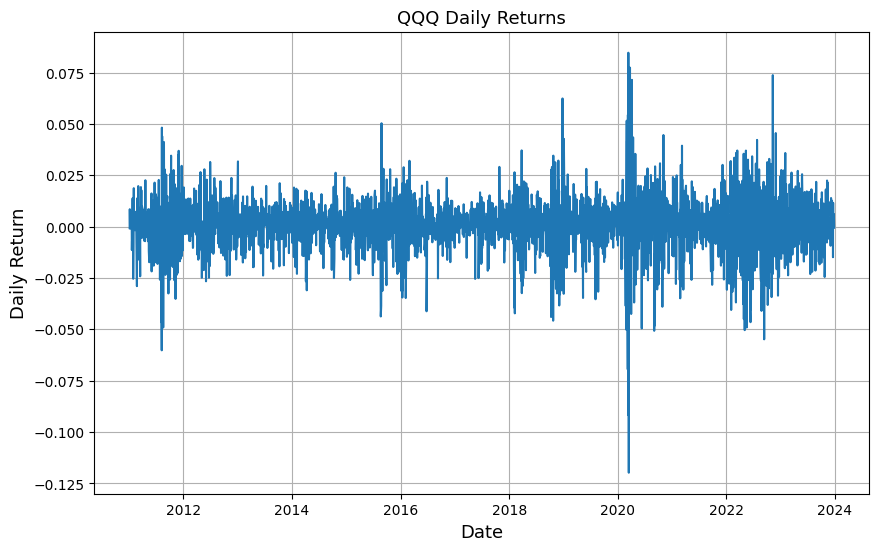

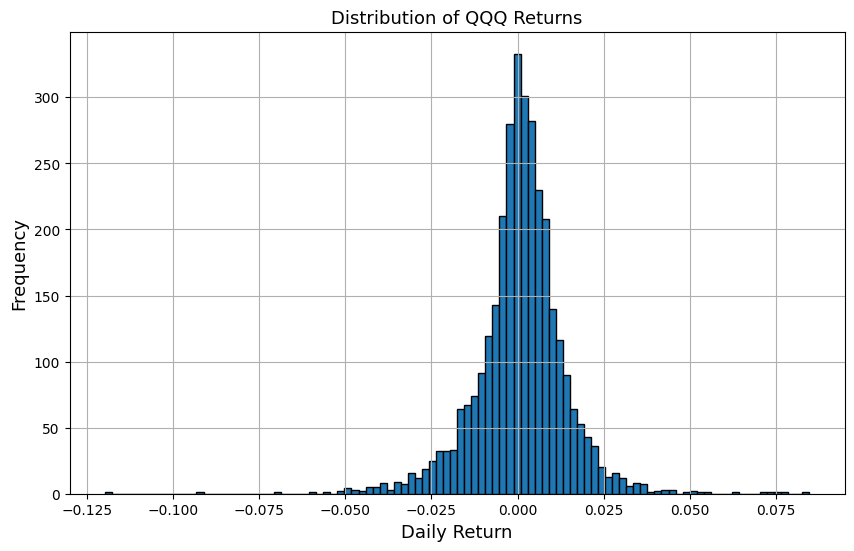

The average expected return percentage for QQQ is: 0.000699542219547367 or 0.0006995
The std or risk (or average volatility for daily returns) percentage for QQQ is: 0.013050395197913442 or 0.0130504
The average annualized volatility percentage for QQQ: 0.20716860122874317 or 0.2071686


In [27]:
# Perform the visualization in a single graph
qqq['Daily Returns'] = ((qqq['Close']) - (qqq['Close'].shift(1)))/(qqq['Close'].shift(1))
qqq['Daily Returns'] = qqq['Daily Returns'].dropna()

# Volatility
volatility = qqq['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(qqq.index, qqq['Daily Returns'])
plt.title('QQQ Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(qqq['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of QQQ Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = qqq['Daily Returns'].mean()
sd = qqq['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for QQQ is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns) percentage for QQQ is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for QQQ: ' + str(av) + ' or ' + str(round(av, 7)))

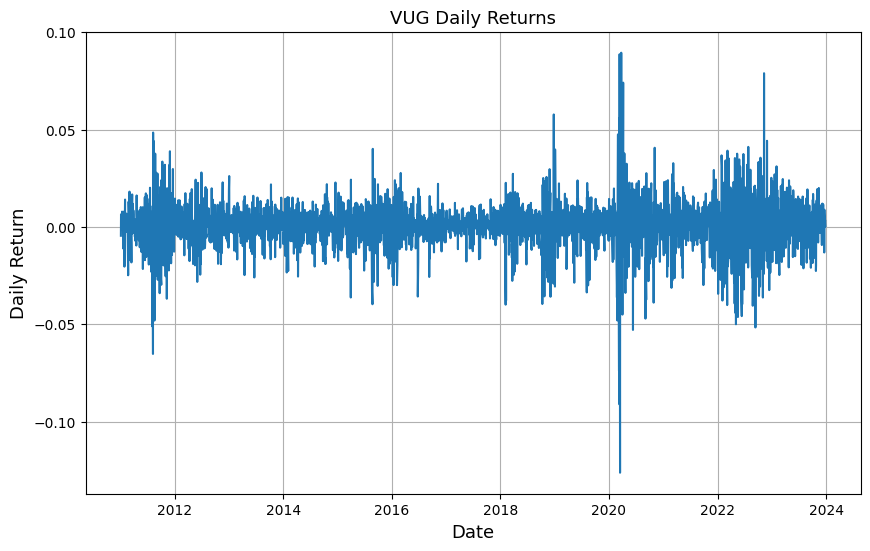

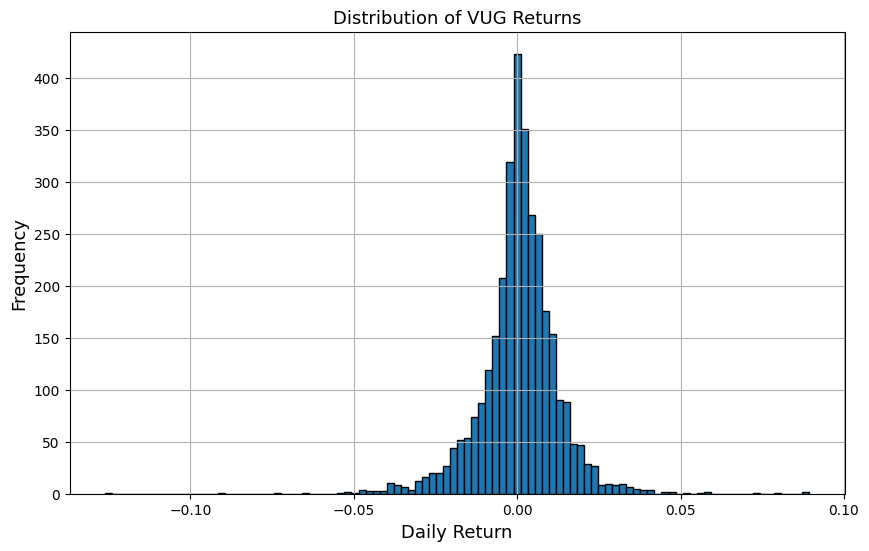

The average expected return percentage for VUG is: 0.000571714706798581 or 0.0005717
The std or risk (or average volatility for daily returns) percentage for VUG is: 0.012381306170941965 or 0.0123813
The average annualized volatility percentage for VUG: 0.1965471422067709 or 0.1965471


In [28]:
# Perform the visualization in a single graph
vug['Daily Returns'] = ((vug['Close']) - (vug['Close'].shift(1)))/(vug['Close'].shift(1))
vug['Daily Returns'] = vug['Daily Returns'].dropna()

# Volatility
volatility = vug['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(vug.index, vug['Daily Returns'])
plt.title('VUG Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(vug['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of VUG Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = vug['Daily Returns'].mean()
sd = vug['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for VUG is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns) percentage for VUG is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for VUG: ' + str(av) + ' or ' + str(round(av, 7)))

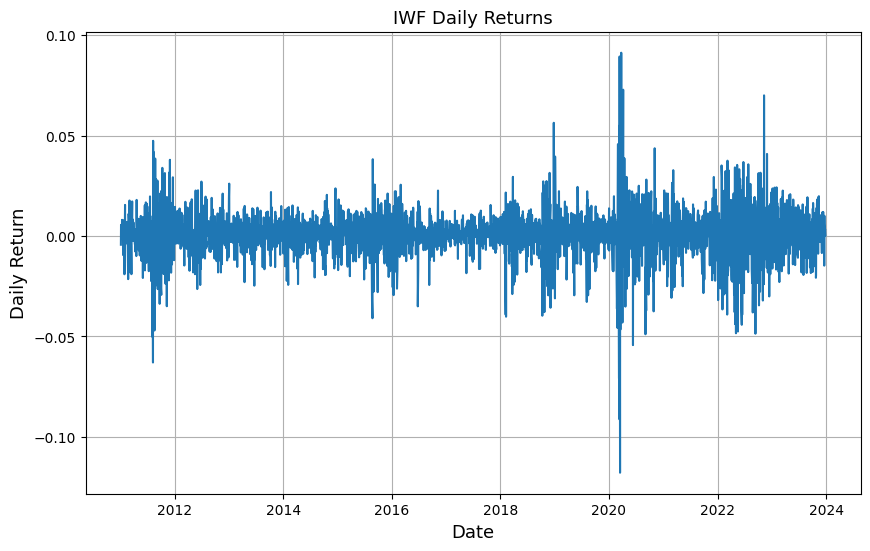

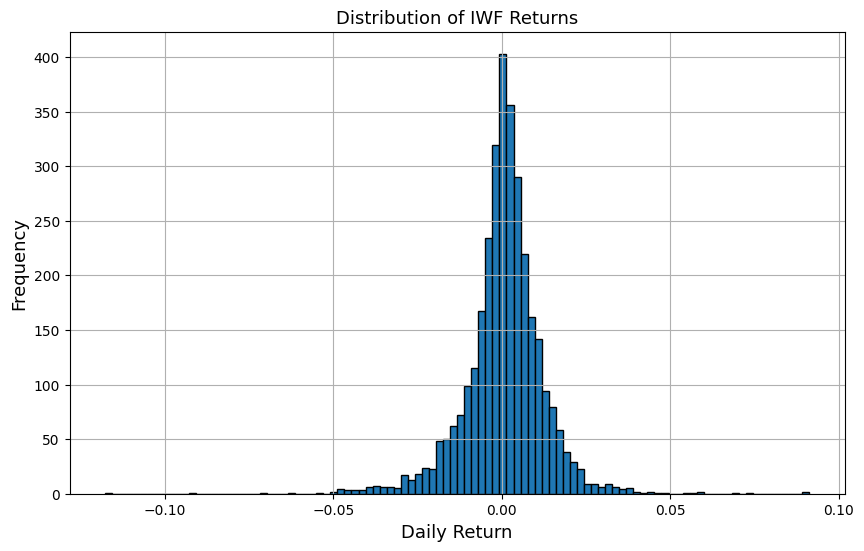

The average expected return percentage for IWF is: 0.0005811958125120883 or 0.0005812
The std or risk (or average volatility for daily returns) percentage for IWF is: 0.01205442468256945 or 0.0120544
The average annualized volatility percentage for IWF: 0.1913580594482249 or 0.1913581


In [29]:
# Perform the visualization in a single graph
iwf['Daily Returns'] = ((iwf['Close']) - (iwf['Close'].shift(1)))/(iwf['Close'].shift(1))
iwf['Daily Returns'] = iwf['Daily Returns'].dropna()

# Volatility
volatility = iwf['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(iwf.index, iwf['Daily Returns'])
plt.title('IWF Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(iwf['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of IWF Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = iwf['Daily Returns'].mean()
sd = iwf['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for IWF is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns) percentage for IWF is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for IWF: ' + str(av) + ' or ' + str(round(av, 7)))

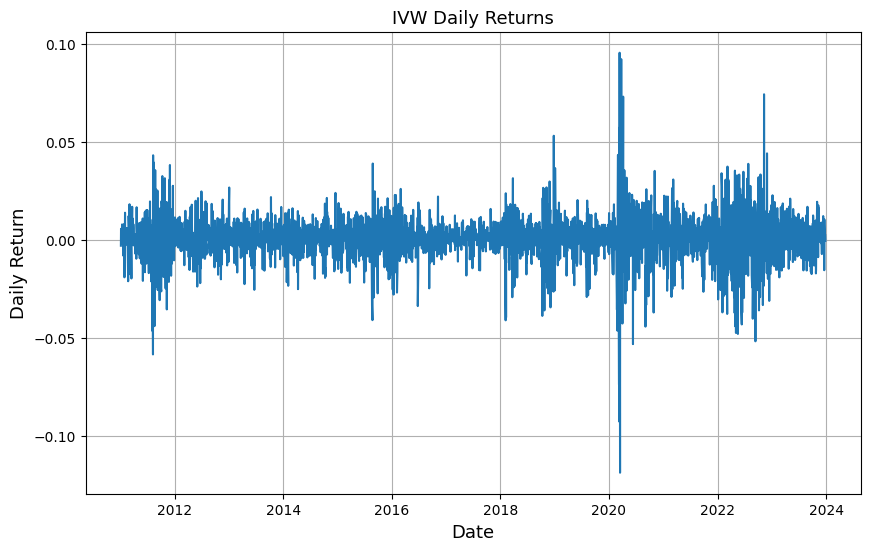

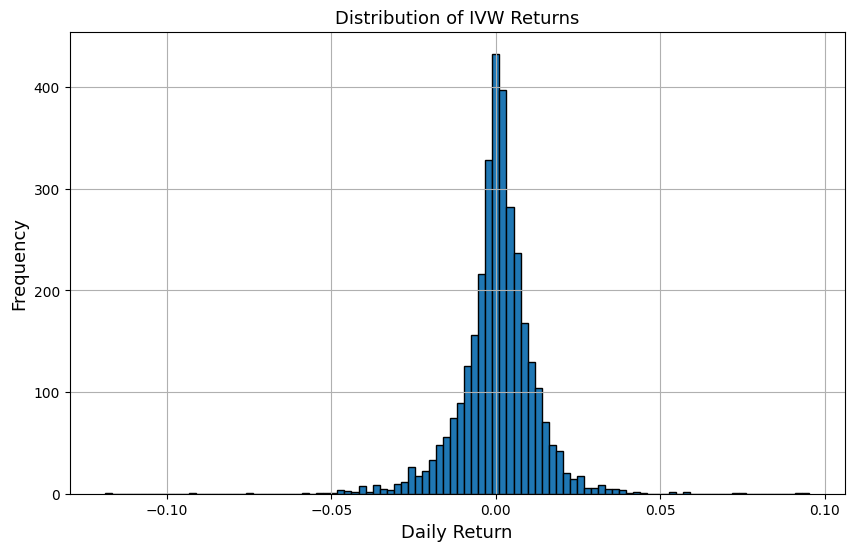

The average expected return percentage for IVW is: 0.000533609282229042 or 0.0005336
The std or risk (or average volatility for daily returns) percentage for IVW is: 0.011775453549779902 or 0.0117755
The average annualized volatility percentage for IVW: 0.1869295300062622 or 0.1869295


In [30]:
# Perform the visualization in a single graph
ivw['Daily Returns'] = ((ivw['Close']) - (ivw['Close'].shift(1)))/(ivw['Close'].shift(1))
ivw['Daily Returns'] = ivw['Daily Returns'].dropna()

# Volatility
volatility = ivw['Daily Returns'].std()

# Annualized volatility (252 days of trading are available per year)
annualized_volatility = volatility * np.sqrt(252)

# Line chart for daily returns
plt.figure(figsize=(10, 6))
plt.plot(ivw.index, ivw['Daily Returns'])
plt.title('IVW Daily Returns', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Daily Return', fontsize=13)
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(ivw['Daily Returns'], bins=100, edgecolor='black')
plt.title('Distribution of IVW Returns', fontsize=13)
plt.xlabel('Daily Return', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)
plt.show()

# Set final variables
m = ivw['Daily Returns'].mean()
sd = ivw['Daily Returns'].std()
av = annualized_volatility

# Print
print('The average expected return percentage for IVW is: ' + str(m) + ' or ' + str(round(m, 7)))
print('The std or risk (or average volatility for daily returns) percentage for IVW is: ' + str(sd) + ' or ' + str(round(sd, 7)))
print('The average annualized volatility percentage for IVW: ' + str(av) + ' or ' + str(round(av, 7)))

### Mean or expected return percentage for each fund goes as QQQ (0.0006995) > IWF (0.0005812) > VUG (0.0005717) > IVW (0.0005336)

### STD or risk (or average volatility for daily returns) percentage goes as QQQ (0.0130504) > VUG (0.0123813) > IWF (0.0120544) > IVW (0.0117755)

### The average annualized volatility percentage goes as QQQ (0.2071686) > VUG (0.1965471) > IWF (0.1913581) > IVW (0.1869295)

### In conclusion, all Return Histograms appear to have outliers (abnormally large spikes from daily return graphs), which is expected. The index fund with historically the highest return & the lowest risk is QQQ, followed by IWF, then VUG, and IVW has the less returns with highest level of risk. Please note that this doesn't determine exact dividend amounts. In addition, remember that Growth funds tend to provide less dividend yields in general compared to Blend and Value funds.

# Step 11 - Correlations: Create Correlation Tables of the Index Fund's own Variables 

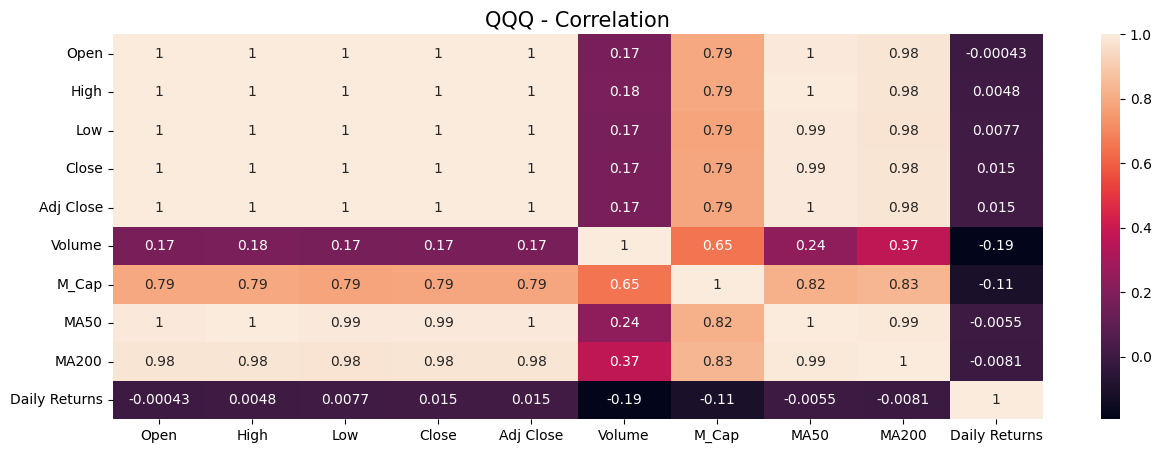

In [31]:
# Correlation table for QQQ
qqq_corr = qqq.corr() 

# Heatmap for QQQ
plt.figure(figsize=(15,5))
sns.heatmap(qqq_corr, annot=True)

# Header
plt.title('QQQ - Correlation', fontsize=15)
plt.show()

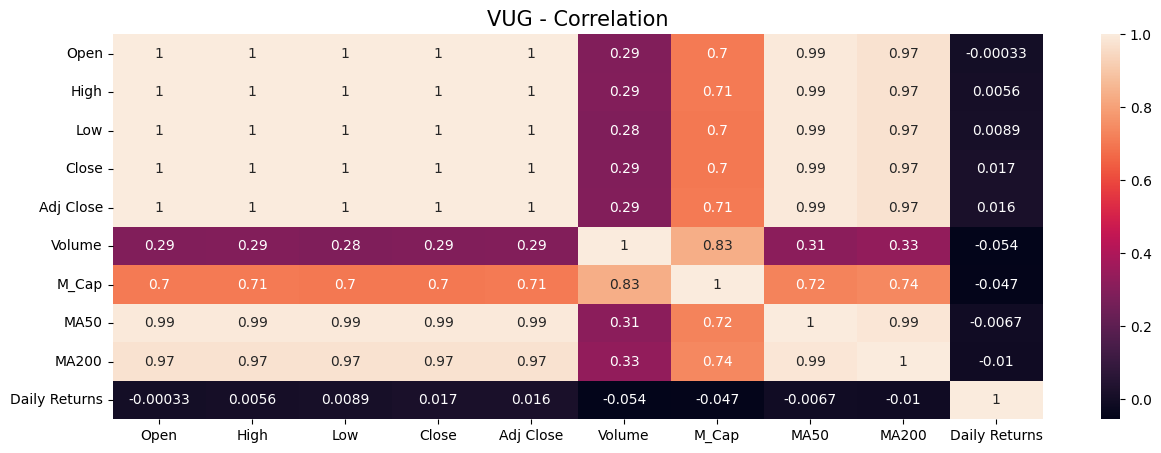

In [32]:
# Correlation table for VUG
vug_corr = vug.corr() 

# Heatmap for VUG
plt.figure(figsize=(15,5))
sns.heatmap(vug_corr, annot=True)

# Header
plt.title('VUG - Correlation', fontsize=15)
plt.show()

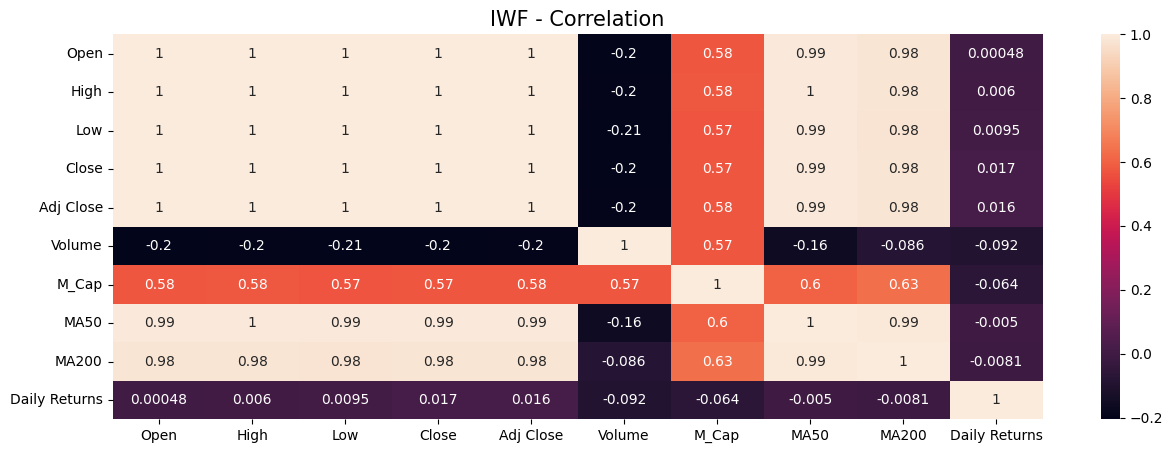

In [33]:
# Correlation table for IWF
iwf_corr = iwf.corr() 

# Heatmap for IWF
plt.figure(figsize=(15,5))
sns.heatmap(iwf_corr, annot=True)

# Header
plt.title('IWF - Correlation', fontsize=15)
plt.show()

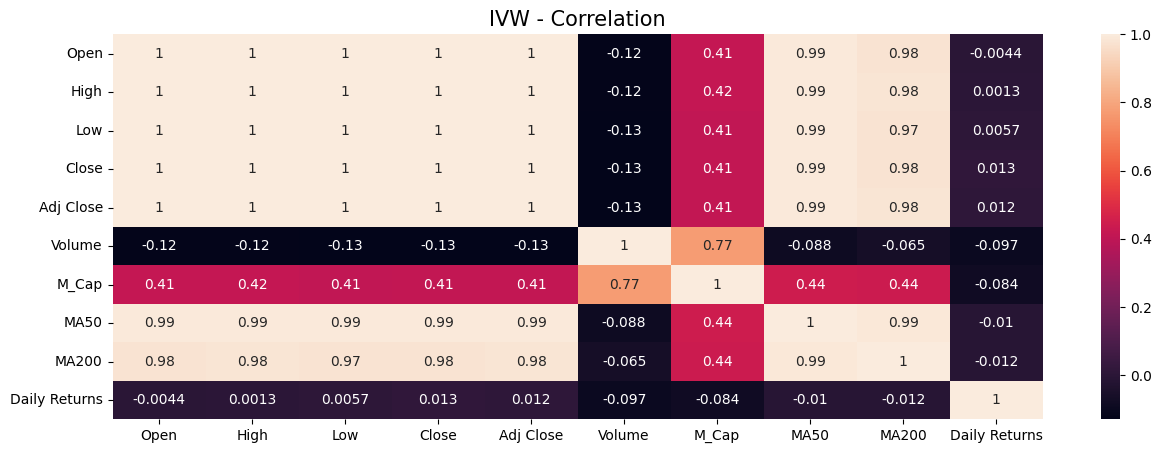

In [34]:
# Correlation table for IVW
ivw_corr = ivw.corr() 

# Heatmap for IWF
plt.figure(figsize=(15,5))
sns.heatmap(ivw_corr, annot=True)

# Header
plt.title('IVW - Correlation', fontsize=15)
plt.show()

### For the given data, the heatmaps shows us that for QQQ & VUG, volume is positively correlated to Open, High, Low, Close, and Adj Close; unlike IWF & IVW which is negatively correlated to the previously mentioned variables. What correlation means is that if Volume was to increase, then it is more likely for prices to go up and vice-versa.

# Step 12 - Correlation among Index Funds

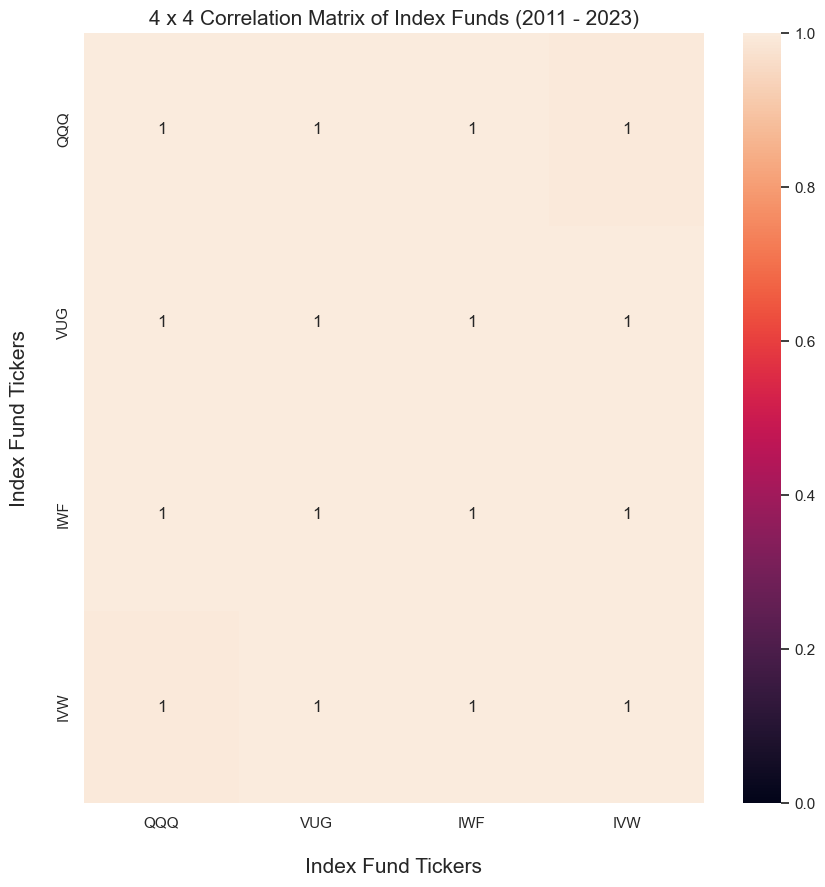

In [35]:
close_prices = pd.DataFrame()
for ticker in tickers:
    close_prices[ticker] = data[ticker]['Close']

corr_matrix = close_prices.corr()

sns.set(style= 'white')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, vmin=0, vmax=1, ax=ax)

# set the axis labels and title
ax.set_xlabel('Index Fund Tickers', labelpad=20, fontsize=15)
ax.set_ylabel('Index Fund Tickers', labelpad=20, fontsize=15)
ax.set_title('4 x 4 Correlation Matrix of Index Funds (2011 - 2023)', fontsize=15);

### The 4-by-4 matrix shows that these index funds are perfectly correlated! The reason being that these funds are NOT diversifying away. Although using a correlation coefficient on its own may not help to predict future stock returns, we know that these funds will move (or trend) in the same direction. Recall that index funds are basically a collection of stocks. Most of these stocks are hold within the 4 funds are the same, therefore behavior will be almost identical - that is why the high/ low/ open price trends are almost identical despite that the funds are weighted differently.

### The correlation of zero (0) is possible when the price movement of (for example) Vanguard Growth Index has no effect on the direction of Invesco QQQ i.e., Invesco QQQ and Vanguard Growth go up and down completely randomly.

# Conclusion - What Should I Invest In?

The 4 ETFs have high volatility, and although these have favorable trend patterns (upward - increasing value as time passes), return ratio may vary, therefore only a few of these Growth Funds or ETFs would be worth buying and holding for many years. It's definitely a bad strategy to purchase an excess amount of shares, unless you have a high risk tolerance. 

As we noticed on the Market Cap graph, QQQ has the best performance on the long term compared to the rest, but that doesn't imply the risk will be low.

In theory, QQQ & VUG should be the only options as these are the only that correlate positively between prices and volume, hence, you may at least get a 'hint' of the ETFs' outcome by looking at the trading volume, however, it is still bad strategy to only rely on positive correlation to make an investment decision. QQQ should be the most convenient ETF to hold, however, it has a high expense ratio of .20% which is high for long-term / passive investors. The next best choice should be VUG as it has an expense ratio of 0.04%. For the record, IWF & IVW have expense ratios of 0.19% & 0.18%. 

Note that when it comes to trending directions, since these 4 ETFs are highly correlated, these will move upward or downward depending on the economy (meaning that if there's a downturn - all of these will fall at the same time).

### Based on these facts, the best long-term investment options (in order from greatest to least) within the 'Large Growth' fund category for passive investors are:
1. VUG
2. QQQ
3. IWF
4. IVW